In [ ]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import keras.backend as k


img_rows = img_cols = 28

#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [ ]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [ ]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model_digit_json = model.to_json()
with open(r"drive/MyDrive/Faks/SimpleMNIST/autosaves/model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


batch_size = 256
num_epoch = 50

earlystopper = EarlyStopping(patience=6, verbose=1)
checkpointer = ModelCheckpoint(r'drive/MyDrive/Faks/SimpleMNIST/autosaves/hand_reader_model_autosave.h5', verbose=1, save_best_only=True)

#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[earlystopper, checkpointer])

Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 0.3726 - accuracy: 0.8820
Epoch 1: val_loss improved from inf to 0.05646, saving model to drive/MyDrive/Faks/SimpleMNIST/autosaves/hand_reader_model_autosave.h5
235/235 [==============================] - 234s 994ms/step - loss: 0.3726 - accuracy: 0.8820 - val_loss: 0.0565 - val_accuracy: 0.9809
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9686
Epoch 2: val_loss improved from 0.05646 to 0.03557, saving model to drive/MyDrive/Faks/SimpleMNIST/autosaves/hand_reader_model_autosave.h5
235/235 [==============================] - 229s 977ms/step - loss: 0.1052 - accuracy: 0.9686 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9784
Epoch 3: val_loss improved from 0.03557 to 0.02920, saving model to drive/MyDrive/Faks/SimpleMNIST/autosaves/hand_reader_model_autosave.h5
235/235 [====================

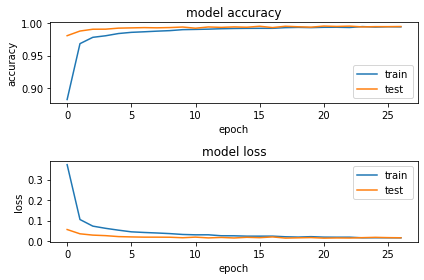

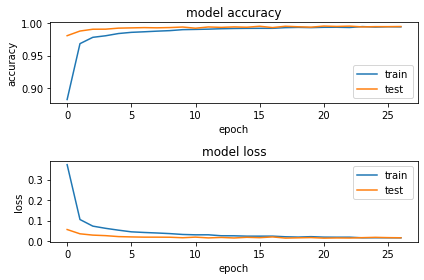

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [ ]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
